In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
import cv2
import numpy as np
from sklearn.utils import shuffle
from random import randint

import tensorflow as tf
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
from keras.applications.inception_v3 import InceptionV3
from keras.applications.mobilenet_v2 import MobileNetV2

In [4]:
train_DIR = "/content/gdrive/MyDrive/Colab-Notebooks/Semester 3/CV/Asgt 3/Dataset/Manual Upload/seg_train/seg_train/"

train_datagen = ImageDataGenerator(shear_range=0.2,
                                zoom_range=0.2,
                                fill_mode="nearest",
                                horizontal_flip=True,
                                vertical_flip=True,rotation_range=90)


train_generator = train_datagen.flow_from_directory(train_DIR,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))

test_DIR = "/content/gdrive/MyDrive/Colab-Notebooks/Semester 3/CV/Asgt 3/Dataset/Manual Upload/seg_test/seg_test/"

validation_datagen = ImageDataGenerator(width_shift_range=0.25,
                                        height_shift_range=0.25,rotation_range=90)


validation_generator = validation_datagen.flow_from_directory(test_DIR,
                                                    batch_size=128,
                                                    class_mode='categorical',
                                                    target_size=(150, 150))


Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [5]:
inceptionV3 = InceptionV3(include_top= False, input_shape=(150,150,3))
for layer in inceptionV3.layers:
	layer.trainable = False

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
last_layer = inceptionV3.get_layer('mixed9')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 2048)


In [7]:
x = tf.keras.layers.Flatten()(last_output)
x = tf.keras.layers.Dense(units = 1024, activation = tf.nn.relu)(x)
x = tf.keras.layers.Dropout(0.3)(x)
x = tf.keras.layers.Dense  (6, activation = tf.nn.softmax)(x)

model = tf.keras.Model( inceptionV3.input, x)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=1,
                                            verbose=1,
                                            factor=0.30,
                                            min_lr=0.0003)

model.compile(loss = 'categorical_crossentropy', optimizer= tf.keras.optimizers.Adam(), metrics=['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [8]:
tf.keras.utils.plot_model(model, to_file='RMSprop.png', show_shapes=True, show_layer_names=True) 

In [9]:
history = model.fit(train_generator,
                    epochs = 10,
                    verbose = 1,
                   validation_data = validation_generator,
                   callbacks=[learning_rate_reduction])

Epoch 1/10
439/439 [==============================] - 3879s 9s/step - loss: 37.7457 - acc: 0.2973 - val_loss: 1.5281 - val_acc: 0.3143
Epoch 2/10
439/439 [==============================] - 123s 280ms/step - loss: 1.5583 - acc: 0.3309 - val_loss: 1.5421 - val_acc: 0.3347
Epoch 3/10
439/439 [==============================] - 121s 277ms/step - loss: 1.5203 - acc: 0.3681 - val_loss: 1.4880 - val_acc: 0.4053
Epoch 4/10
439/439 [==============================] - 122s 278ms/step - loss: 1.4866 - acc: 0.3825 - val_loss: 1.4595 - val_acc: 0.3740

Epoch 00004: ReduceLROnPlateau reducing learning rate to 0.0003000000142492354.
Epoch 5/10
439/439 [==============================] - 119s 272ms/step - loss: 1.4154 - acc: 0.4042 - val_loss: 1.3608 - val_acc: 0.4610
Epoch 6/10
439/439 [==============================] - 118s 269ms/step - loss: 1.3912 - acc: 0.4262 - val_loss: 1.3945 - val_acc: 0.4497

Epoch 00006: ReduceLROnPlateau reducing learning rate to 0.0003.
Epoch 7/10
439/439 [==================

In [26]:
model.save('/content/gdrive/MyDrive/Colab-Notebooks/Semester 3/CV/Asgt 3/Weights/InceptionV3-1.h5')

In [15]:
from tensorflow import keras
model = keras.models.load_model('/content/gdrive/MyDrive/Colab-Notebooks/Semester 3/CV/Asgt 3/Weights/InceptionV3.h5')

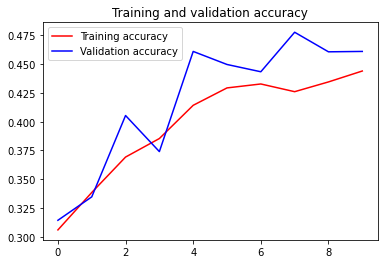

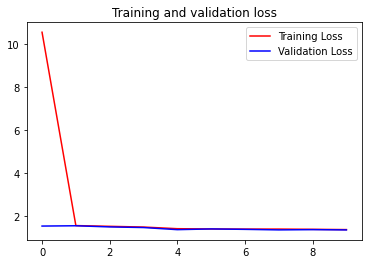

In [10]:
%matplotlib inline
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Prediction for this image is : buildings


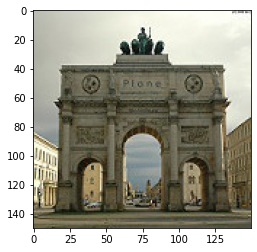

In [11]:
import numpy as np
from keras.preprocessing import image

file_path =  '/content/gdrive/MyDrive/Colab-Notebooks/Semester 3/CV/Asgt 3/Dataset/Manual Upload/seg_pred/seg_pred/buildings/103.jpg'

test_image = image.load_img(file_path, target_size = (150, 150))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

classes=train_generator.class_indices

classes=['buildings','forest','glacier','mountain','sea','street']

print("Prediction for this image is :",classes[np.argmax(result)])